# Time Series Forecasting Example

This notebook demonstrates how to apply some of the standard time series forecasting methods in Python. A great introduction to time series forecasting can be found in [1] and [2]. Some of the code of this notebook is adapted from https://www.statsmodels.org/stable/examples/notebooks/generated/exponential_smoothing.html and from https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/

[1] Hyndman, R.J., & Athanasopoulos, G. (2021) Forecasting: principles and practice, 3rd edition, OTexts: Melbourne, Australia. https://otexts.com/fpp3/

[2] Brownlee, J. (2020) Introduction to time series forecasting with python: how to prepare data and develop models to predict the future. Machine Learning Mastery.

## Definition of symmetric mean absolute percentage error 

The symmetric mean absolute percentage error (sMAPE) is a scale-invariant error measure for time series forecasts. More information can be found at: https://en.wikipedia.org/wiki/Symmetric_mean_absolute_percentage_error

In [55]:
# Define the function to calculate the sMAPE
import numpy as np

def smape(a, f):
    return 1/len(a) * np.sum(200 * np.abs(f-a) / (np.abs(a) + np.abs(f)))

## Standard imports 

In [56]:
# standard imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.arima.model import ARIMA

%matplotlib inline

## Load Datasets

In [57]:
# oil dataset taken from Hyndman, R.J., & Athanasopoulos, G. (2021) Forecasting: principles and practice, 
# 3rd edition, OTexts: Melbourne, Australia. https://otexts.com/fpp3/
data = [
    446.6565,
    454.4733,
    455.663,
    423.6322,
    456.2713,
    440.5881,
    425.3325,
    485.1494,
    506.0482,
    526.792,
]
index = pd.date_range(start="1996", end="2006", freq="A")
data = pd.Series(data, index)
oildata_train = pd.DataFrame({'data':data.values}).set_index(data.index)

data = [
    514.2689,
    494.211,
]
index = pd.date_range(start="2006", end="2008", freq="A")
data = pd.Series(data, index)
oildata_test = pd.DataFrame({'data':data.values}).set_index(data.index)

In [58]:
# air passengers dataset taken from Hyndman, R.J., & Athanasopoulos, G. (2021) Forecasting: principles and practice, 
# 3rd edition, OTexts: Melbourne, Australia. https://otexts.com/fpp3/
data = [
    17.5534,
    21.86,
    23.8866,
    26.9293,
    26.8885,
    28.8314,
    30.0751,
    30.9535,
    30.1857,
    31.5797,
    32.5776,
    33.4774,
]
index = pd.date_range(start="1990", end="2002", freq="A")
air_train = pd.Series(data, index)


data = [
    39.0216,
    41.3864,
    41.5966,
]
index = pd.date_range(start="2002", end="2005", freq="A")
air_test = pd.Series(data, index)

In [59]:
# sheep livestock dataset taken from Hyndman, R.J., & Athanasopoulos, G. (2021) Forecasting: principles and practice, 
# 3rd edition, OTexts: Melbourne, Australia. https://otexts.com/fpp3/
data = [
    263.9177,
    268.3072,
    260.6626,
    266.6394,
    277.5158,
    283.834,
    290.309,
    292.4742,
    300.8307,
    309.2867,
    318.3311,
    329.3724,
    338.884,
    339.2441,
    328.6006,
    314.2554,
    314.4597,
    321.4138,
    329.7893,
    346.3852,
    352.2979,
    348.3705,
    417.5629,
    417.1236,
    417.7495,
    412.2339,
    411.9468,
    394.6971,
    401.4993,
    408.2705,
    414.2428,
]
index = pd.date_range(start="1970", end="2001", freq="A")
livestock_train = pd.Series(data, index)

data = [407.9979, 403.4608, 413.8249, 428.105, 445.3387, 452.9942, 455.7402]
index = pd.date_range(start="2001", end="2008", freq="A")
livestock_test = pd.Series(data, index)

In [60]:
# Australian tourists dataset taken from Hyndman, R.J., & Athanasopoulos, G. (2021) Forecasting: principles and practice, 
# 3rd edition, OTexts: Melbourne, Australia. https://otexts.com/fpp3/
data = [
    41.7275,
    24.0418,
    32.3281,
    37.3287,
    46.2132,
    29.3463,
    36.4829,
    42.9777,
    48.9015,
    31.1802,
    37.7179,
    40.4202,
    51.2069,
    31.8872,
    40.9783,
    43.7725,
    55.5586,
    33.8509,
]
index = pd.date_range(start="2005", end="2009-Q2", freq="QS-OCT")
aust_train = pd.Series(data, index)


data = [
    42.0764,
    45.6423,
    59.7668,
    35.1919,
    44.3197,
    47.9137,
]
index = pd.date_range(start="2009-Q3", end="2010-Q4", freq="QS-OCT")
aust_test = pd.Series(data, index)

## Plot Oil dataset 

Text(0.5, 1.0, 'Annual oil production in Saudi Arabia from 1996 to 2007.')

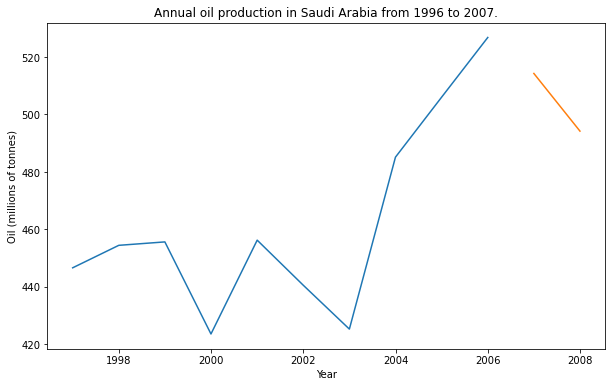

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(oildata_train, label='Train')
plt.plot(oildata_test, label='Test')
plt.xlabel("Year")
plt.ylabel("Oil (millions of tonnes)")
plt.title("Annual oil production in Saudi Arabia from 1996 to 2007.")

## Simple Forecasting Methods

The naive random walk predicts every future value as the last known value of the time series. The average predicts every future value as the mean value of the complete time series. The moving average computes every future value as the average of a rolling window. For more information, see: https://otexts.com/fpp3/simple-methods.html

C:\Users\Mirko\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Mirko\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


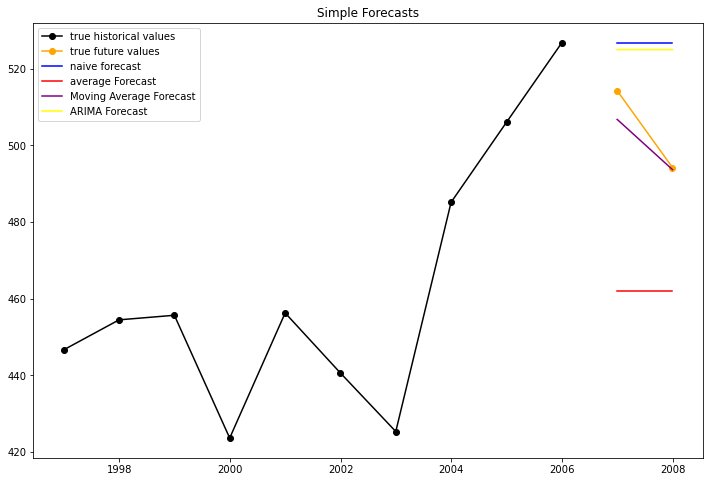

In [62]:
n_train = len(oildata_train)
n_test  = len(oildata_test)

# naive forecasts
y_hat_naive = oildata_test.copy()
y_hat_naive['data'] = np.repeat(oildata_train.values[n_train-1],n_test)

# average forecasts
y_hat_avg = oildata_test.copy()
y_hat_avg['data'] = np.repeat(oildata_train.values.mean(),n_test)

# moving average forecasts
y_hat_ma = oildata_test.copy()
model = ARIMA(oildata_train, order=(1, 0, 0))
model_fit = model.fit()
y_hat_ma = model_fit.forecast(n_test)

# ARIMA forecasts
model = ARIMA(oildata_train, order=(1,1,1))
model_fit = model.fit()
y_hat_arima = model_fit.forecast(2)


# plots
plt.figure(figsize=(12, 8))
plt.plot(oildata_train, marker="o", color="black",label='true historical values')
plt.plot(oildata_test, marker="o", color="orange",label='true future values')
plt.plot(y_hat_naive, color="blue",label='naive forecast')
plt.plot(y_hat_avg, color='red', label='average Forecast')
plt.plot(y_hat_ma, color='purple', label='Moving Average Forecast')
plt.plot(y_hat_arima, color='yellow', label='ARIMA Forecast')

plt.title("Simple Forecasts")
plt.legend()

In [63]:
from sklearn.metrics import mean_squared_error
from math import sqrt
print('RMSE_naive=',sqrt(mean_squared_error(oildata_test, y_hat_naive)))
print('RMSE_avg=',sqrt(mean_squared_error(oildata_test, y_hat_avg)))
print('RMSE_ma=',sqrt(mean_squared_error(oildata_test, y_hat_ma)))
print('RMSE_arima=',sqrt(mean_squared_error(oildata_test, y_hat_arima)))
print('sMAPE_naive=',smape(oildata_test.values,y_hat_naive.values))
print('sMAPE_avg=',smape(oildata_test.values,y_hat_avg.values))
print('sMAPE_ma=',smape(oildata_test.values,y_hat_ma.values))
print('sMAPE_arima=',smape(oildata_test.values,y_hat_arima.values))

RMSE_naive= 24.681466676536882
RMSE_avg= 43.35519791896349
RMSE_ma= 5.311553668117824
RMSE_arima= 23.040033679663956
sMAPE_naive= 4.393994932732992
sMAPE_avg= 8.70945235912319
sMAPE_ma= 4.086746229057143
sMAPE_arima= 8.099596995245621


### Simple exponential smoothing 

Three variants of simple exponential smoothing: 1. fit1 uses the pre-defined smoothing parameter $\alpha=0.2$, fit2 uses $\alpha=0.6$ and fit3 uses the automatic parameter optimization function of statsmodels. For more information, see https://otexts.com/fpp3/expsmooth.html

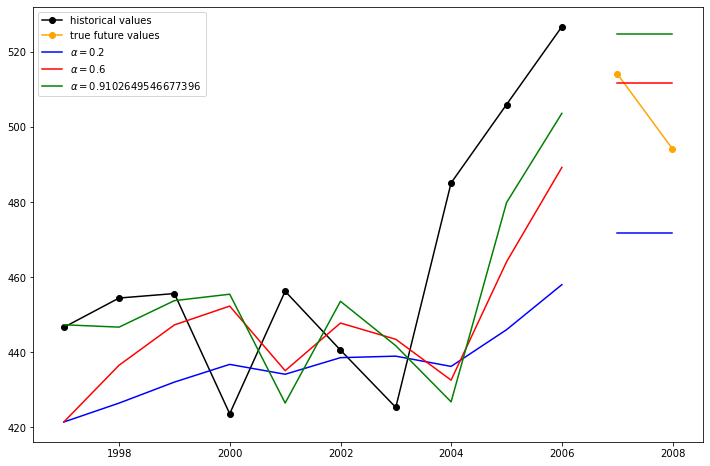

In [64]:
# Fit SES model with alpha=0.2 and forecast 2 years into the future
fit1 = SimpleExpSmoothing(oildata_train, initialization_method="heuristic").fit(
    smoothing_level=0.2, optimized=False)
fcast1 = fit1.forecast(n_test).rename(r"$\alpha=0.2$")

# Fit SES model with alpha=0.6 and forecast 2 years into the future
fit2 = SimpleExpSmoothing(oildata_train, initialization_method="heuristic").fit(
    smoothing_level=0.6, optimized=False)
fcast2 = fit2.forecast(n_test).rename(r"$\alpha=0.6$")

# Fit SES model with optimized alpha and forecast 2 years into the future
fit3 = SimpleExpSmoothing(oildata_train, initialization_method="estimated").fit()
fcast3 = fit3.forecast(n_test).rename(r"$\alpha=%s$" % fit3.model.params["smoothing_level"])

# plot the fits and the forecasts
plt.figure(figsize=(12, 8))
(hist,) = plt.plot(oildata_train, marker="o", color="black")
(true,) = plt.plot(oildata_test, marker="o", color="orange")
plt.plot(fit1.fittedvalues, color="blue")
(line1,) = plt.plot(fcast1, color="blue")
plt.plot(fit2.fittedvalues, color="red")
(line2,) = plt.plot(fcast2, color="red")
plt.plot(fit3.fittedvalues, color="green")
(line3,) = plt.plot(fcast3, color="green")
plt.legend([hist, true, line1, line2, line3], ['historical values', 'true future values', fcast1.name, fcast2.name, fcast3.name])

In [65]:
print('RMSE_fcast1=',sqrt(mean_squared_error(oildata_test, fcast1)))
print('RMSE_fcast2=',sqrt(mean_squared_error(oildata_test, fcast2)))
print('RMSE_fcast3=',sqrt(mean_squared_error(oildata_test, fcast3)))
print('sMAPE_fcast1=',smape(oildata_test.values,fcast1.values))
print('sMAPE_fcast2=',smape(oildata_test.values,fcast2.values))
print('sMAPE_fcast3=',smape(oildata_test.values,fcast3.values))

RMSE_fcast1= 33.96782683681052
RMSE_fcast2= 12.551312945429963
RMSE_fcast3= 22.803878013923402
sMAPE_fcast1= 13.259446870854147
sMAPE_fcast2= 3.9780163602157286
sMAPE_fcast3= 8.000258248063133


### Holt's exponential smoothing 

Three different versions of Holt's exponential smoothing are used to produce forecasts for the air passenger dataset. fit1 uses Holt's linear additive trend model with smoothing parameters $\alpha=0.2$ and $\beta=0.8$. fit2 uses Holt's exponential trend model rather than a Holt’s additive model with the same parameters. fit3 uses a damped versions of Holt’s additive model again with the same values for the smoothing parameters but with an automatic optimization of the dampening parameter. for more informations, see https://otexts.com/fpp3/expsmooth.html

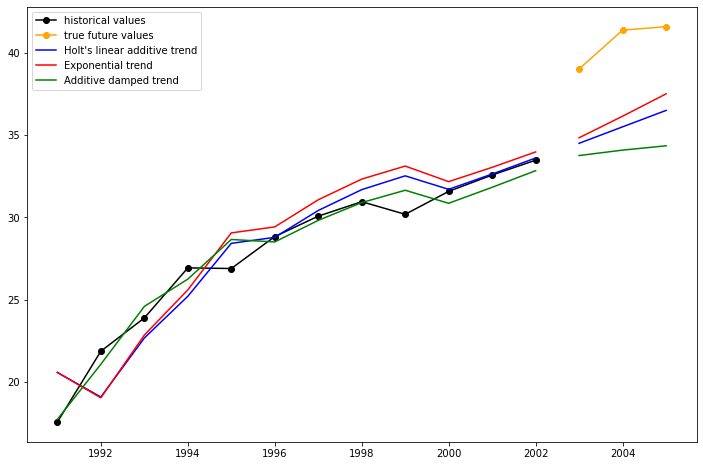

In [66]:
n_train = len(air_train)
n_test  = len(air_test)

# Fit Holt's linear additive trend model with alpha=0.8, beta=0.2 and forecast 4 years into the future
fit1 = Holt(air_train, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
fcast1 = fit1.forecast(n_test).rename("Holt's linear additive trend")

# Fit Holt's exponential trend model with alpha=0.8, beta=0.2 and forecast 4 years into the future
fit2 = Holt(air_train, exponential=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2, optimized=False)
fcast2 = fit2.forecast(n_test).rename("Exponential trend")

# Fit Holt's linear damped additive trend model with alpha=0.8, beta=0.2 and forecast 4 years into the future
fit3 = Holt(air_train, damped_trend=True, initialization_method="estimated").fit(
    smoothing_level=0.8, smoothing_trend=0.2)
fcast3 = fit3.forecast(n_test).rename("Additive damped trend")

# plot the fits and the forecasts
plt.figure(figsize=(12, 8))
(hist,) = plt.plot(air_train, marker="o", color="black")
(true,) = plt.plot(air_test, marker="o", color="orange")
plt.plot(fit1.fittedvalues, color="blue")
(line1,) = plt.plot(fcast1, color="blue")
plt.plot(fit2.fittedvalues, color="red")
(line2,) = plt.plot(fcast2, color="red")
plt.plot(fit3.fittedvalues, color="green")
(line3,) = plt.plot(fcast3, color="green")
plt.legend([hist, true, line1, line2, line3], ['historical values', 'true future values', fcast1.name, fcast2.name, fcast3.name])

In [67]:
print('RMSE_fcast1=',sqrt(mean_squared_error(air_test, fcast1)))
print('RMSE_fcast2=',sqrt(mean_squared_error(air_test, fcast2)))
print('RMSE_fcast3=',sqrt(mean_squared_error(air_test, fcast3)))
print('sMAPE_fcast1=',smape(air_test.values,fcast1.values))
print('sMAPE_fcast2=',smape(air_test.values,fcast2.values))
print('sMAPE_fcast3=',smape(air_test.values,fcast3.values))

RMSE_fcast1= 5.193425608711778
RMSE_fcast2= 4.529504638965502
RMSE_fcast3= 6.668055294233026
sMAPE_fcast1= 13.540727908029384
sMAPE_fcast2= 11.714826995502236
sMAPE_fcast3= 17.622093311089223


### Seasonally adjusted data 

Five different versions of exponential smoothing models are applied, exponential versus additive and damped versus non-damped. For more information, see https://otexts.com/fpp3/expsmooth.html

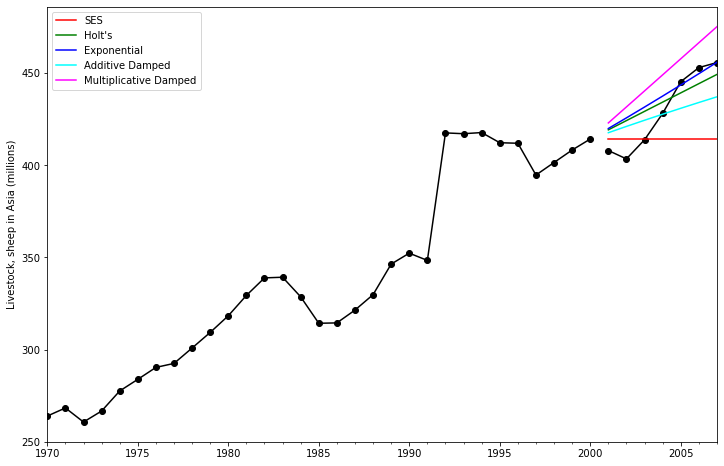

Figure 7.5: Forecasting livestock, sheep in Asia: comparing forecasting performance of non-seasonal methods.


,SES,Holt's,Exponential,Additive,Multiplicative
$\alpha$,1.000000,0.974304,0.977638,0.978847,0.974910
$\beta$,NaN,0.000000,0.000000,0.000000,0.000000
$\phi$,NaN,NaN,NaN,0.980000,0.981636
$l_0$,263.917663,258.880967,260.340570,257.357883,258.941860
$b_0$,NaN,5.011579,1.013780,6.645553,1.038160
SSE,6761.350235,6004.138221,6104.194748,6036.555023,6081.995136


In [68]:
n_train = len(livestock_train)
n_test  = len(livestock_test)

# Fit SES model with and forecast 7 years into the future
fit1 = SimpleExpSmoothing(livestock_train, initialization_method="estimated").fit()
fcast1 = fit1.forecast(n_test).rename("SES")

# Fit Holt's trend model and forecast 7 years into the future
fit2 = Holt(livestock_train, initialization_method="estimated").fit()
fcast2 = fit2.forecast(n_test).rename("Holt's")

# Fit Holt's exponential trend model and forecast 7 years into the future
fit3 = Holt(livestock_train, exponential=True, initialization_method="estimated").fit()
fcast3 = fit3.forecast(n_test).rename("Exponential")

# Fit Holt's damped trend model with dampening factor 0.98 and forecast 7 years into the future
fit4 = Holt(livestock_train, damped_trend=True, initialization_method="estimated").fit(damping_trend=0.98)
fcast4 = fit4.forecast(n_test).rename("Additive Damped")

# Fit Holt's exponential damped trend model and forecast 7 years into the future
fit5 = Holt(livestock_train, exponential=True, damped_trend=True, initialization_method="estimated").fit()
fcast5 = fit5.forecast(n_test).rename("Multiplicative Damped")

ax = livestock_train.plot(color="black", marker="o", figsize=(12, 8))
livestock_test.plot(ax=ax, color="black", marker="o", legend=False)
fcast1.plot(ax=ax, color="red", legend=True)
fcast2.plot(ax=ax, color="green", legend=True)
fcast3.plot(ax=ax, color="blue", legend=True)
fcast4.plot(ax=ax, color="cyan", legend=True)
fcast5.plot(ax=ax, color="magenta", legend=True)
ax.set_ylabel("Livestock, sheep in Asia (millions)")
plt.show()
print("Figure 7.5: Forecasting livestock, sheep in Asia: comparing forecasting performance of non-seasonal methods.")

params = [
    "smoothing_level",
    "smoothing_trend",
    "damping_trend",
    "initial_level",
    "initial_trend",]

results = pd.DataFrame(
    index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$l_0$", "$b_0$", "SSE"],
    columns=["SES", "Holt's", "Exponential", "Additive", "Multiplicative"],)

results["SES"] = [fit1.params[p] for p in params] + [fit1.sse]
results["Holt's"] = [fit2.params[p] for p in params] + [fit2.sse]
results["Exponential"] = [fit3.params[p] for p in params] + [fit3.sse]
results["Additive"] = [fit4.params[p] for p in params] + [fit4.sse]
results["Multiplicative"] = [fit5.params[p] for p in params] + [fit5.sse]
results

In [69]:
print('RMSE_fcast1=',sqrt(mean_squared_error(livestock_test, fcast1)))
print('RMSE_fcast2=',sqrt(mean_squared_error(livestock_test, fcast2)))
print('RMSE_fcast3=',sqrt(mean_squared_error(livestock_test, fcast3)))
print('RMSE_fcast4=',sqrt(mean_squared_error(livestock_test, fcast4)))
print('RMSE_fcast5=',sqrt(mean_squared_error(livestock_test, fcast5)))
print('sMAPE_fcast1=',smape(livestock_test.values,fcast1.values))
print('sMAPE_fcast2=',smape(livestock_test.values,fcast2.values))
print('sMAPE_fcast3=',smape(livestock_test.values,fcast3.values))
print('sMAPE_fcast4=',smape(livestock_test.values,fcast4.values))
print('sMAPE_fcast5=',smape(livestock_test.values,fcast5.values))

RMSE_fcast1= 25.462144883436768
RMSE_fcast2= 11.879833159800855
RMSE_fcast3= 12.291388655017549
RMSE_fcast4= 14.287414630159185
RMSE_fcast5= 20.273894534267463
sMAPE_fcast1= 4.7514412983688885
sMAPE_fcast2= 2.5085133752160704
sMAPE_fcast3= 2.2575501908764046
sMAPE_fcast4= 2.9952393446640087
sMAPE_fcast5= 4.459112476051795


### Holt-Winters seasonal exponential smoothing 

Holt’-Winters seasonal exponential smoothing includes a trend component and a seasonal component. statsmodels allows for all the combinations including as shown in the examples below: 

fit1 additive trend, additive seasonal of period season_length=4 and the use of a Box-Cox transformation. 

fit2 additive trend, multiplicative seasonal of period season_length=4 and the use of a Box-Cox transformation.

fit3 additive damped trend, additive seasonal of period season_length=4 and the use of a Box-Cox transformation.

fit4 additive damped trend, multiplicative seasonal of period season_length=4 and the use of a Box-Cox transformation.

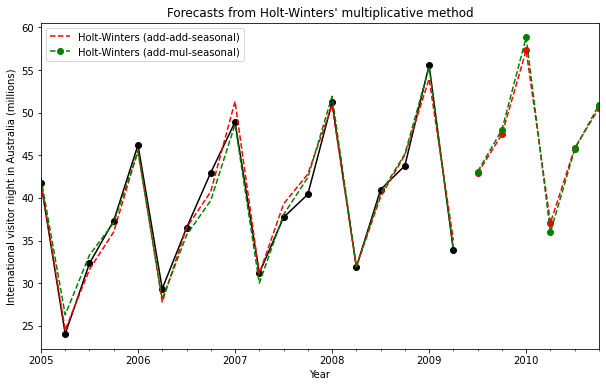

Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality.


,Additive,Multiplicative,Additive Dam,Multiplica Dam
$\alpha$,0.536486,1.490116e-08,1.490131e-08,1.490116e-08
$\beta$,0.000000,1.184863e-08,5.760342e-12,9.199205e-10
$\phi$,NaN,NaN,8.956402e-01,9.160790e-01
$\gamma$,0.000000,0.000000e+00,1.206616e-14,0.000000e+00
$l_0$,10.611656,1.069217e+01,1.039615e+01,1.002373e+01
$b_0$,0.137185,1.242324e-01,3.442495e-01,2.699884e-01
SSE,30.522441,2.808837e+01,2.139781e+01,2.359464e+01


In [70]:
n_train = len(aust_train)
n_test  = len(aust_test)

fit1 = ExponentialSmoothing(
    aust_train,
    seasonal_periods=4,
    trend="add",
    seasonal="add",
    use_boxcox=True,
    initialization_method="estimated",
).fit()
fit2 = ExponentialSmoothing(
    aust_train,
    seasonal_periods=4,
    trend="add",
    seasonal="mul",
    use_boxcox=True,
    initialization_method="estimated",
).fit()
fit3 = ExponentialSmoothing(
    aust_train,
    seasonal_periods=4,
    trend="add",
    seasonal="add",
    damped_trend=True,
    use_boxcox=True,
    initialization_method="estimated",
).fit()
fit4 = ExponentialSmoothing(
    aust_train,
    seasonal_periods=4,
    trend="add",
    seasonal="mul",
    damped_trend=True,
    use_boxcox=True,
    initialization_method="estimated",
).fit()
results = pd.DataFrame(
    index=[r"$\alpha$", r"$\beta$", r"$\phi$", r"$\gamma$", r"$l_0$", "$b_0$", "SSE"]
)
#
fcast1 = fit1.forecast(n_test).rename("Additive")
fcast2 = fit2.forecast(n_test).rename("Multiplicative")
fcast3 = fit3.forecast(n_test).rename("Additive Damped")
fcast4 = fit4.forecast(n_test).rename("Multiplcative Damped")


params = [
    "smoothing_level",
    "smoothing_trend",
    "damping_trend",
    "smoothing_seasonal",
    "initial_level",
    "initial_trend",
]
results["Additive"] = [fit1.params[p] for p in params] + [fit1.sse]
results["Multiplicative"] = [fit2.params[p] for p in params] + [fit2.sse]
results["Additive Dam"] = [fit3.params[p] for p in params] + [fit3.sse]
results["Multiplica Dam"] = [fit4.params[p] for p in params] + [fit4.sse]

ax = aust_train.plot(
    figsize=(10, 6),
    marker="o",
    color="black",
    title="Forecasts from Holt-Winters' multiplicative method",
)
ax.set_ylabel("International visitor night in Australia (millions)")
ax.set_xlabel("Year")
fit1.fittedvalues.plot(ax=ax, style="--", color="red")
fit2.fittedvalues.plot(ax=ax, style="--", color="green")

fit1.forecast(n_test).rename("Holt-Winters (add-add-seasonal)").plot(
    ax=ax, style="--", marker="o", color="red", legend=True
)
fit2.forecast(n_test).rename("Holt-Winters (add-mul-seasonal)").plot(
    ax=ax, style="--", marker="o", color="green", legend=True
)

plt.show()
print(
    "Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality.")

results

In [71]:
print('RMSE_fcast1=',sqrt(mean_squared_error(aust_test, fcast1)))
print('RMSE_fcast2=',sqrt(mean_squared_error(aust_test, fcast2)))
print('RMSE_fcast3=',sqrt(mean_squared_error(aust_test, fcast3)))
print('RMSE_fcast4=',sqrt(mean_squared_error(aust_test, fcast4)))
print('sMAPE_fcast1=',smape(aust_test.values,fcast1.values))
print('sMAPE_fcast2=',smape(aust_test.values,fcast2.values))
print('sMAPE_fcast3=',smape(aust_test.values,fcast3.values))
print('sMAPE_fcast4=',smape(aust_test.values,fcast4.values))

RMSE_fcast1= 1.9397666606807977
RMSE_fcast2= 1.7743248247771863
RMSE_fcast3= 2.5467219208904703
RMSE_fcast4= 1.9893784415697633
sMAPE_fcast1= 3.973318229131833
sMAPE_fcast2= 3.381052371937902
sMAPE_fcast3= 4.103488725278349
sMAPE_fcast4= 3.3350617541639327
